In [81]:
from pandas import Series
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot
import os
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np
from numpy.lib.stride_tricks import as_strided
import scipy.stats as stats

#  ML
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier


In [82]:
# read data from csv
df = pd.read_csv('./csv/p3.csv')
df.head()

,time,C1,C10,C11,C12,C13,C14,C15,C16,C17,...,C3,C4,C5,C6,C7,C8,C9,Label,Question,TimeUnix
0,0,-0.000005,-0.000002,NaN,NaN,0.000009,6.897600e-07,NaN,-0.000013,0.000009,...,NaN,-0.000023,-0.000008,-0.000020,NaN,-0.000006,-0.000009,2,0,1543459144
1,1,0.000034,0.000022,NaN,NaN,0.000043,4.340410e-05,NaN,0.000014,0.000030,...,NaN,-0.000001,0.000001,-0.000007,NaN,0.000012,0.000023,2,0,1543459144
2,2,0.000074,0.000045,NaN,NaN,0.000077,8.548780e-05,NaN,0.000041,0.000052,...,NaN,0.000021,0.000010,0.000006,NaN,0.000030,0.000055,2,0,1543459144
3,3,0.000113,0.000068,NaN,NaN,0.000109,1.262300e-04,NaN,0.000067,0.000072,...,NaN,0.000043,0.000018,0.000019,NaN,0.000048,0.000086,2,0,1543459145
4,4,0.000151,0.000090,NaN,NaN,0.000141,1.649480e-04,NaN,0.000093,0.000093,...,NaN,0.000064,0.000027,0.000032,NaN,0.000065,0.000116,2,0,1543459145


152


Text(0.5, 0, 'Frame (7.8125/s)')

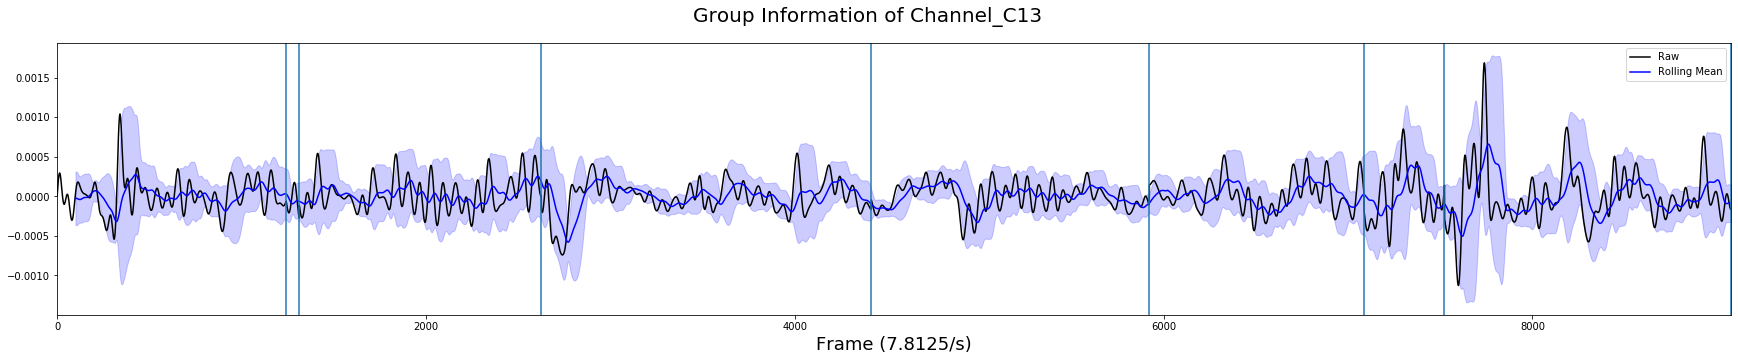

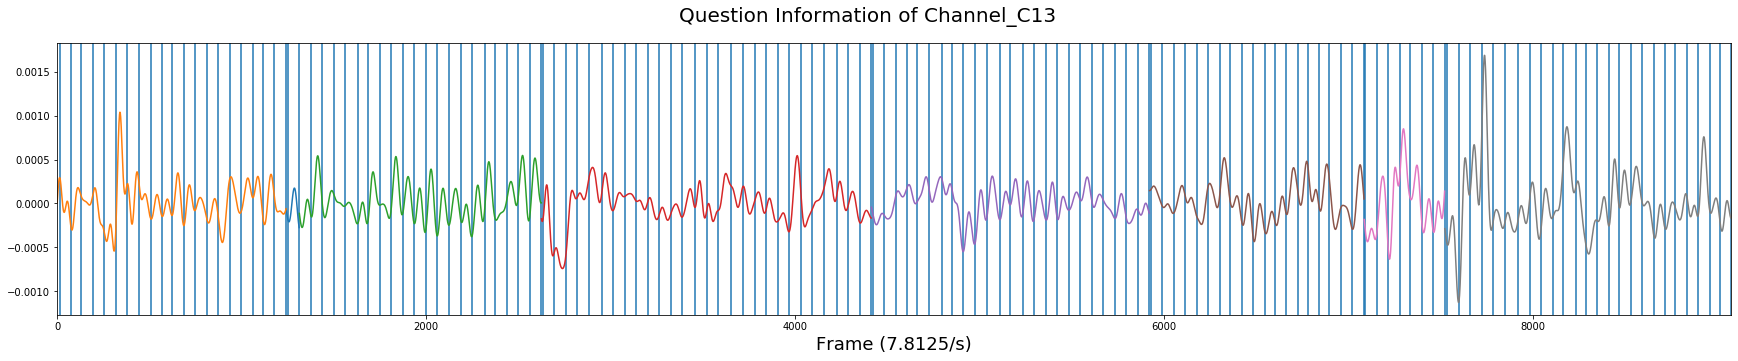

In [83]:
# parameters
# G2 letter G3 Number G4 Orientation G5 shape G7 word G8 Combination
targetC = 'C13' # front c1 c8 c3 left c12 c11 c17 right c12,c1 70% c11 60% c16 c13 bad  p7 70 p1 p12 p10 60 p9 p2  p13p3 p4 p8 p6 55 p5 50 p11 p14
windowsize = 100

# plot rolling mean and std
c1 = df[targetC]
ma = c1.rolling(window =windowsize).mean()
mstd = c1.rolling(window =windowsize).std()
c2 = df[targetC]
fig =plt.figure(figsize=(30,5))
plt.plot(c1, 'k',label = 'Raw')
plt.plot(ma.index, ma, 'b',label ='Rolling Mean')
plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)

# plot group segmentations
grouped_Label = df.groupby(['Label'])
groupIndex = grouped_Label['time'].max()
for xc in groupIndex:
    plt.axvline(x=xc)
plt.legend()

# standardize the figure
X_max = len(c1)
plt.xlim(0,X_max)
title = "Group Information of Channel_"+targetC
fig.suptitle(title,fontsize = 20)
plt.xlabel('Frame (7.8125/s)', fontsize=18)

# plot question segmentations
groupC1 = df.groupby(['Label'])[targetC]
grouped_Question = df.groupby(['Question'])
questionIndex = grouped_Question['time'].max()
fig2 = plt.figure(figsize=(30,5))
for xc in questionIndex:
    plt.axvline(x=xc)
groupC1.plot()
print(len(questionIndex))

# standardize the figure
title = "Question Information of Channel_"+targetC
fig2.suptitle(title,fontsize = 20)
plt.xlabel('Frame (7.8125/s)', fontsize=18)

In [84]:
groupData = df.groupby(['Label'])
# groupData.first()
dataFrameArr = []
for name,group in groupData:
    # print(name) 
    # print(group) 
    # print(group.describe())
    dataFrameArr.append(group)
# print(dataFrameArr[0])
# count_each_group = groupData.count()
# print(count_each_group)

In [85]:
# test rolling windows

# overlapping function  
def windowed_view(arr, window, overlap): 
    arr = np.asarray(arr)
    window_step = window - overlap
    new_shape = arr.shape[:-1] + ((arr.shape[-1] - overlap) // window_step,
                                 window)
    new_strides = (arr.strides[:-1] + (window_step * arr.strides[-1],) +
                   arr.strides[-1:])
    return as_strided(arr, shape=new_shape, strides=new_strides)

# get processed date per channels per group funtion
def overlapData_pergroup_perChannels(groupIndex,channel,windowSize,overlap):
    # single channel
    signleGroup = dataFrameArr[groupIndex]
    c1Arr = signleGroup[channel].to_numpy()
    frame2Arr = c1Arr
    # print(frame2Arr)
    series_overlap = windowed_view(frame2Arr,windowSize,overlap) 
    print('The length of this data is ',len(series_overlap))
    return series_overlap






In [86]:
# parameters 

windowsize_group = 160 # 235
overlapping = 80 #227 150

processedChannel = targetC
groupIndex_overlap = 1   # delete 0,6

C1_2 = overlapData_pergroup_perChannels(1,processedChannel,windowsize_group,overlapping)
C1_3 = overlapData_pergroup_perChannels(2,processedChannel,windowsize_group,overlapping)
C1_4 = overlapData_pergroup_perChannels(3,processedChannel,windowsize_group,overlapping)
C1_5 = overlapData_pergroup_perChannels(4,processedChannel,windowsize_group,overlapping)
C1_6 = overlapData_pergroup_perChannels(5,processedChannel,windowsize_group,overlapping)
C1_8 = overlapData_pergroup_perChannels(7,processedChannel,windowsize_group,overlapping)

processed_Arr = []
processed_Arr.append(C1_2)
processed_Arr.append(C1_3)
processed_Arr.append(C1_4)
processed_Arr.append(C1_5)
processed_Arr.append(C1_6)
processed_Arr.append(C1_8)
print(len(processed_Arr))

The length of this data is  14
The length of this data is  15
The length of this data is  21
The length of this data is  17
The length of this data is  13
The length of this data is  18
6


14
15
21
17
13
18


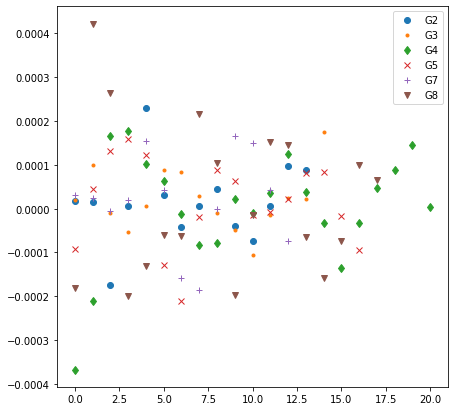

In [87]:
# get features
# mean

# why zscore? the zscore will change the charaters of mean and std, we will lose features
# before zscore, normal distribution? the features are not inclued within the mean and std
mean_arr = []
z_mean = []




for data in processed_Arr:
    
    win_avg = np.mean(data,axis=-1)
    print(len(win_avg))
    mean_arr.append(win_avg)
    z = stats.zscore(win_avg)
    z_mean.append(z)



fig =plt.figure(figsize=(7,7))
plt.plot(mean_arr[0],'o',label="G2")
plt.plot(mean_arr[1],'.',label="G3")
plt.plot(mean_arr[2],'d',label="G4")
plt.plot(mean_arr[3],'x',label="G5")
plt.plot(mean_arr[4],'+',label="G7")
plt.plot(mean_arr[5],'v',label="G8")
plt.legend(numpoints=1)

# fig =plt.figure(figsize=(7,7))
# plt.plot(z_mean[0],'o',label="G2")
# plt.plot(z_mean[1],'.',label="G3")
# plt.plot(z_mean[2],'d',label="G4")
# plt.plot(z_mean[3],'x',label="G5")
# plt.plot(z_mean[4],'+',label="G7")
# plt.plot(z_mean[5],'v',label="G8")
# plt.legend(numpoints=1)



# for marker in ['o', '.', ',', 'x', '+', 'v']:
#     plt.plot(mean_arr,y, marker,label="marker='{0}'".format(marker))
# plt.legend(numpoints=1)
# plt.plot(mean_arr[0])
# print(len(mean_arr))

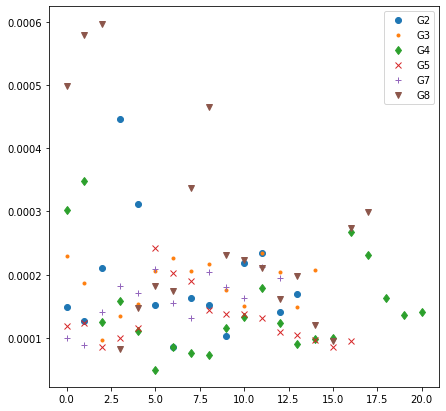

In [88]:
# standard deviation
std_arr = []
z_std = []
for data in processed_Arr:
    win_std = np.std(data,axis=-1)
    # print(len(win_std))
    std_arr.append(win_std)
    z = stats.zscore(win_std)
    z_std.append(z)

fig =plt.figure(figsize=(7,7))
plt.plot(std_arr[0],'o',label="G2")
plt.plot(std_arr[1],'.',label="G3")
plt.plot(std_arr[2],'d',label="G4")
plt.plot(std_arr[3],'x',label="G5")
plt.plot(std_arr[4],'+',label="G7")
plt.plot(std_arr[5],'v',label="G8")

plt.legend(numpoints=1)

# fig =plt.figure(figsize=(7,7))
# plt.plot(z_std[0],'o',label="G2")
# plt.plot(z_std[1],'.',label="G3")
# plt.plot(z_std[2],'d',label="G4")
# plt.plot(z_std[3],'x',label="G5")
# plt.plot(z_std[4],'+',label="G7")
# plt.plot(z_std[5],'v',label="G8")

# plt.legend(numpoints=1)

# print(len(std_arr))

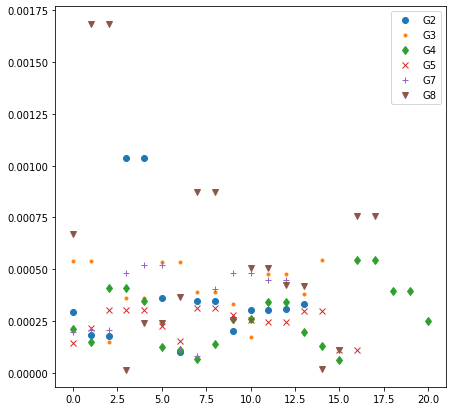

In [89]:
peak_arr = []
z_peak = []
for data in processed_Arr:
    win_max = np.max(data,axis=-1)
    # print(len(win_max))
    peak_arr.append(win_max)
    z = stats.zscore(win_max)
    z_peak.append(z)

fig =plt.figure(figsize=(7,7))
plt.plot(peak_arr[0],'o',label="G2")
plt.plot(peak_arr[1],'.',label="G3")
plt.plot(peak_arr[2],'d',label="G4")
plt.plot(peak_arr[3],'x',label="G5")
plt.plot(peak_arr[4],'+',label="G7")
plt.plot(peak_arr[5],'v',label="G8")

plt.legend(numpoints=1)

# fig =plt.figure(figsize=(7,7))
# plt.plot(z_peak[0],'o',label="G2")
# plt.plot(z_peak[1],'.',label="G3")
# plt.plot(z_peak[2],'d',label="G4")
# plt.plot(z_peak[3],'x',label="G5")
# plt.plot(z_peak[4],'+',label="G7")
# plt.plot(z_peak[5],'v',label="G8")

# plt.legend(numpoints=1)

14
15
21
17
13
18
6
14 15 21 17 13 18


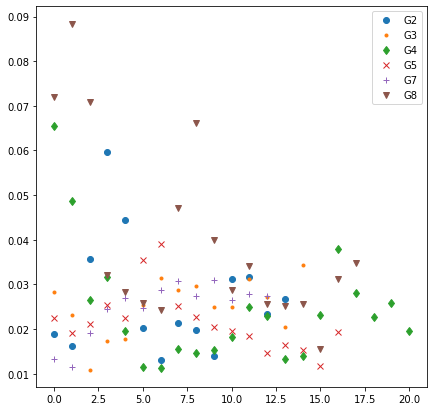

In [90]:
# AUC the area under the curve summing the absolute values of the signal ??
AUC_arr = []
for data in processed_Arr:
    win_abc = np.abs(data)
    win_sum = np.sum(win_abc,axis=-1)
    print(len(win_sum))
    AUC_arr.append(win_sum)

fig =plt.figure(figsize=(7,7))
plt.plot(AUC_arr[0],'o',label="G2")
plt.plot(AUC_arr[1],'.',label="G3")
plt.plot(AUC_arr[2],'d',label="G4")
plt.plot(AUC_arr[3],'x',label="G5")
plt.plot(AUC_arr[4],'+',label="G7")
plt.plot(AUC_arr[5],'v',label="G8")

plt.legend(numpoints=1)

print(len(AUC_arr))

print(len(AUC_arr[0]),len(AUC_arr[1]),len(AUC_arr[2]),len(AUC_arr[3]),len(AUC_arr[4]),len(AUC_arr[5]),)


14
15
21
17
13
18
14 15 21 17 13 18


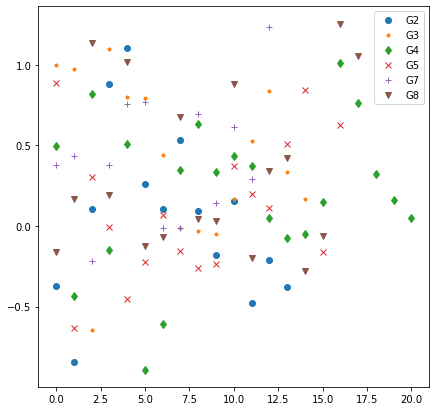

In [91]:
# skewness
skew_arr = []
for data in processed_Arr:
    win_skew = stats.skew(data,axis=-1)
    # print(win_skew)
    print(len(win_skew))
    skew_arr.append(win_skew)

fig =plt.figure(figsize=(7,7))
plt.plot(skew_arr[0],'o',label="G2")
plt.plot(skew_arr[1],'.',label="G3")
plt.plot(skew_arr[2],'d',label="G4")
plt.plot(skew_arr[3],'x',label="G5")
plt.plot(skew_arr[4],'+',label="G7")
plt.plot(skew_arr[5],'v',label="G8")

plt.legend(numpoints=1)

print(len(skew_arr[0]),len(skew_arr[1]),len(skew_arr[2]),len(skew_arr[3]),len(skew_arr[4]),len(skew_arr[5]),)

14
15
21
17
13
18


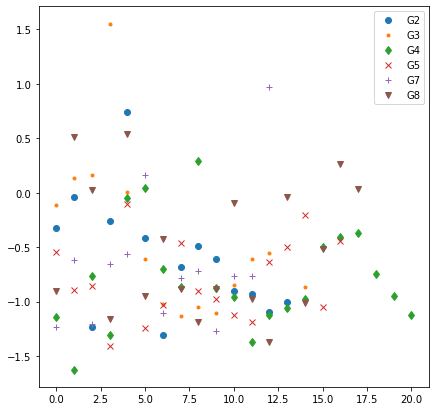

In [92]:
 # Kurt
kurt_arr = []
for data in processed_Arr:
    win_kurt = stats.kurtosis(data,axis=-1)
    # print(win_skew)
    print(len(win_kurt))
    kurt_arr.append(win_kurt)

fig =plt.figure(figsize=(7,7))
plt.plot(kurt_arr[0],'o',label="G2")
plt.plot(kurt_arr[1],'.',label="G3")
plt.plot(kurt_arr[2],'d',label="G4")
plt.plot(kurt_arr[3],'x',label="G5")
plt.plot(kurt_arr[4],'+',label="G7")
plt.plot(kurt_arr[5],'v',label="G8")

plt.legend(numpoints=1)

#print(len(kurt_arr[0]),len(kurt_arr[1]),len(kurt_arr[2]),len(kurt_arr[3]),len(kurt_arr[4]),len(kurt_arr[5]),)

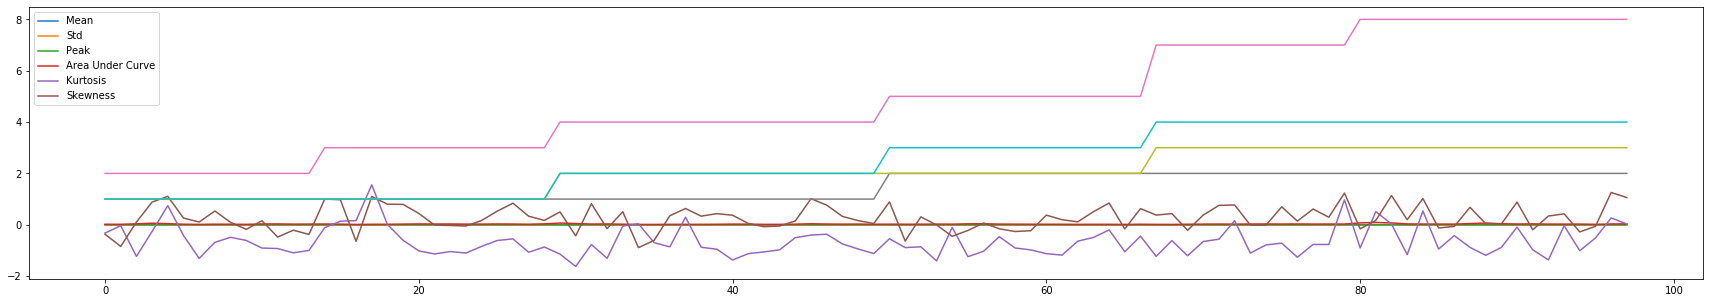

In [93]:
# combination 
mean_com = np.concatenate([mean_arr[0],mean_arr[1],mean_arr[2],mean_arr[3],mean_arr[4],mean_arr[5]])
std_com = np.concatenate([std_arr[0],std_arr[1],std_arr[2],std_arr[3],std_arr[4],std_arr[5]])
peak_com = np.concatenate([peak_arr[0],peak_arr[1],peak_arr[2],peak_arr[3],peak_arr[4],peak_arr[5]])
AUC_com = np.concatenate([AUC_arr[0],AUC_arr[1],AUC_arr[2],AUC_arr[3],AUC_arr[4],AUC_arr[5]])
kurt_com = np.concatenate([kurt_arr[0],kurt_arr[1],kurt_arr[2],kurt_arr[3],kurt_arr[4],kurt_arr[5]])
skew_com = np.concatenate([skew_arr[0],skew_arr[1],skew_arr[2],skew_arr[3],skew_arr[4],skew_arr[5]])
Class_G2 = np.full(len(mean_arr[0]),2)
Class_G3 = np.full(len(mean_arr[1]),3)
Class_G4 = np.full(len(mean_arr[2]),4)
Class_G5 = np.full(len(mean_arr[3]),5)
Class_G7 = np.full(len(mean_arr[4]),7)
Class_G8 = np.full(len(mean_arr[5]),8)
class_allGroup = np.concatenate([Class_G2,Class_G3,Class_G4,Class_G5,Class_G7,Class_G8])

Class_G2 = np.full(len(mean_arr[0]),1)
Class_G3 = np.full(len(mean_arr[1]),1)
Class_G4 = np.full(len(mean_arr[2]),1)
Class_G5 = np.full(len(mean_arr[3]),2)
Class_G7 = np.full(len(mean_arr[4]),2)
Class_G8 = np.full(len(mean_arr[5]),2)
class_allGroup2 = np.concatenate([Class_G2,Class_G3,Class_G4,Class_G5,Class_G7,Class_G8])

Class_G2 = np.full(len(mean_arr[0]),1)
Class_G3 = np.full(len(mean_arr[1]),1)
Class_G4 = np.full(len(mean_arr[2]),2)
Class_G5 = np.full(len(mean_arr[3]),2)
Class_G7 = np.full(len(mean_arr[4]),3)
Class_G8 = np.full(len(mean_arr[5]),3)
class_allGroup3 = np.concatenate([Class_G2,Class_G3,Class_G4,Class_G5,Class_G7,Class_G8])

Class_G2 = np.full(len(mean_arr[0]),1)
Class_G3 = np.full(len(mean_arr[1]),1)
Class_G4 = np.full(len(mean_arr[2]),2)
Class_G5 = np.full(len(mean_arr[3]),3)
Class_G7 = np.full(len(mean_arr[4]),4)
Class_G8 = np.full(len(mean_arr[5]),4)
class_allGroup4 = np.concatenate([Class_G2,Class_G3,Class_G4,Class_G5,Class_G7,Class_G8])

plt.figure(figsize=(30,5))
plt.plot(mean_com,label="Mean")
plt.plot(std_com,label="Std")
plt.plot(peak_com,label="Peak")
plt.plot(AUC_com,label="Area Under Curve")
plt.plot(kurt_com,label="Kurtosis")
plt.plot(skew_com,label="Skewness")
plt.plot(class_allGroup)
plt.plot(class_allGroup2)
plt.plot(class_allGroup3)
plt.plot(class_allGroup4)
plt.legend(numpoints=1)

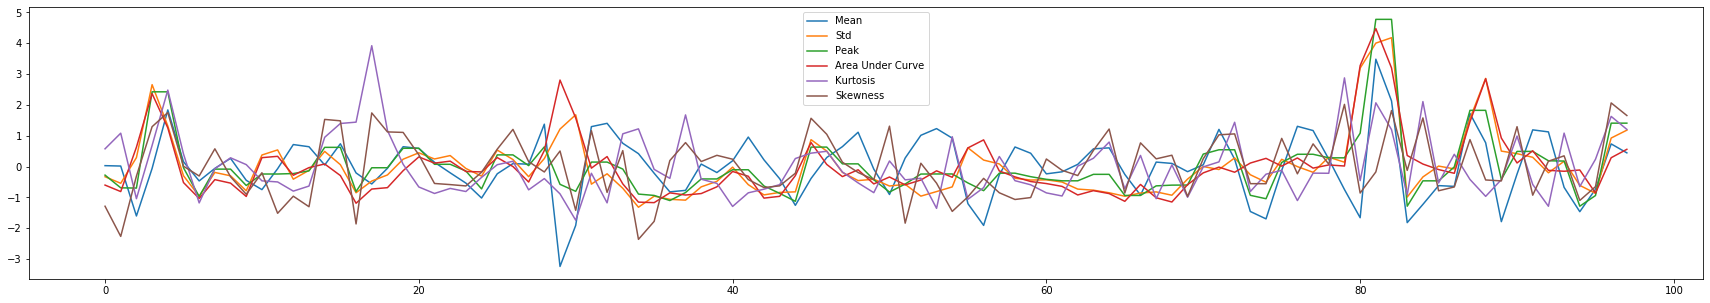

In [94]:
# Normalization
mean_com_z = stats.zscore(mean_com)
std_com_z = stats.zscore(std_com)
peak_com_z = stats.zscore(peak_com)
AUC_com_z = stats.zscore(AUC_com)
kurt_com_z = stats.zscore(kurt_com)
skew_com_z = stats.zscore(skew_com)
plt.figure(figsize=(30,5))
plt.plot(mean_com_z,label="Mean")
plt.plot(std_com_z,label="Std")
plt.plot(peak_com_z,label="Peak")
plt.plot(AUC_com_z,label="Area Under Curve")
plt.plot(kurt_com_z,label="Kurtosis")
plt.plot(skew_com_z,label="Skewness")
plt.legend(numpoints=1)

In [95]:
# convert to dataframe
rawData = {'Group':class_allGroup, 'Mean':mean_com,'Std':std_com,'Peak':peak_com,'AUC':AUC_com,'Kurt':kurt_com,'Skew':skew_com}
df_features = pd.DataFrame(rawData)
df_features['Group2'] = class_allGroup2
df_features['Group3'] = class_allGroup3
df_features['Group4'] = class_allGroup4
# print(df_features.head())

zData = {'Group':class_allGroup, 'Mean':mean_com_z,'Std':std_com_z,'Peak':peak_com_z,'AUC':AUC_com_z,'Kurt':kurt_com_z,'Skew':skew_com_z}
df_features_z = pd.DataFrame(zData)
df_features_z['Group2'] = class_allGroup2
df_features_z['Group3'] = class_allGroup3
df_features_z['Group4'] = class_allGroup4
print(df_features_z)

Group      Mean       Std      Peak       AUC      Kurt      Skew  Group2  \
0       2  0.028670 -0.330220 -0.277986 -0.601942  0.575065 -1.288183       1   
1       2  0.015982 -0.544089 -0.691228 -0.812238  1.082371 -2.266958       1   
2       2 -1.604382  0.289655 -0.699003  0.626588 -1.043247 -0.312003       1   
3       2 -0.061177  2.656684  2.424615  2.365405  0.685157  1.293677       1   
4       2  1.836982  1.316568  2.424615  1.255041  2.480778  1.751234       1   
..    ...       ...       ...       ...       ...       ...       ...     ...   
93      8 -0.675773  0.171654  0.177087 -0.153389  1.084303  0.347173       2   
94      8 -1.464997 -0.611661 -1.286672 -0.111896 -0.650279 -1.099941       2   
95      8 -0.736509 -0.869692 -0.941680 -0.862389  0.235881 -0.653284       2   
96      8  0.734356  0.924709  1.407813  0.285706  1.626671  2.064380       2   
97      8  0.443274  1.180266  1.407813  0.558913  1.205299  1.655493       2   

    Group3  Group4  
0        1

Text(0.5, 0, 'Corss Validation Training Instances')

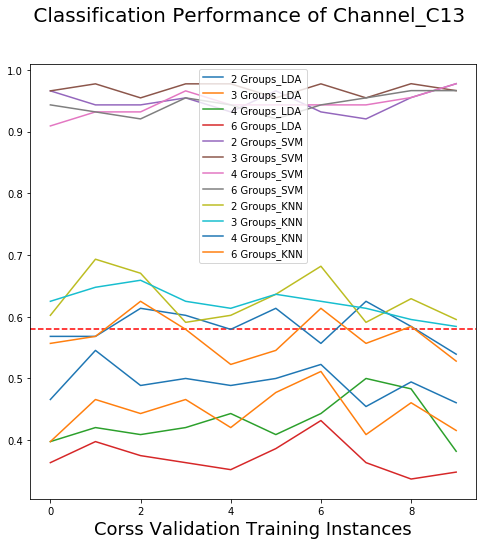

In [96]:
# cross validation 
# time series split  dose the past affect the future?
kf =KFold(n_splits = 10, shuffle= True, random_state=2)
train_arr =[]
test_arr = []
g_6 = []
g_3 = [] # 2-3,4-5,7-8
g_2 = [] # 2 3 4, 5 7 8
g_4 = []

g_6_svm = []
g_3_svm = []
g_2_svm = []
g_4_svm = []

g_6_knn = []
g_3_knn = []
g_2_knn = []
g_4_knn = []
for train_index,test_index in kf.split(df_features_z):
    train = df_features_z.iloc[train_index]
    test = df_features_z.iloc[test_index]
    # print(train)
    # print(test)
    # train_arr.append(train)
    # test_arr.append(test)
    x_train = train[['Mean','Std','Peak','AUC','Kurt','Skew']]
    y_train3 = train['Group3']
    y_train2 = train['Group2']
    y_train6 = train['Group']
    y_train4 = train['Group4']
    x_test = train[['Mean','Std','Peak','AUC','Kurt','Skew']]
    y_test3 = train['Group3']
    y_test2 = train['Group2']
    y_test6 = train['Group']
    y_test4 = train['Group4']

    # clf =LinearDiscriminantAnalysis() 
    clf =LinearDiscriminantAnalysis()

    clf.fit(x_train,y_train6)
    score_mean = clf.score(x_test,y_test6)
    g_6.append(score_mean)

    clf.fit(x_train,y_train3)
    score_mean = clf.score(x_test,y_test3)
    g_3.append(score_mean)

    clf.fit(x_train,y_train2)
    score_mean = clf.score(x_test,y_test2)
    g_2.append(score_mean)

    clf.fit(x_train,y_train4)
    score_mean = clf.score(x_test,y_test4)
    g_4.append(score_mean)

 # svm
    clf_svm =svm.SVC(gamma=2, C=1)

    clf_svm.fit(x_train,y_train6)
    score_mean = clf_svm.score(x_test,y_test6)
    g_6_svm.append(score_mean)

    clf_svm.fit(x_train,y_train3)
    score_mean = clf_svm.score(x_test,y_test3)
    g_3_svm.append(score_mean)

    clf_svm.fit(x_train,y_train2)
    score_mean = clf_svm.score(x_test,y_test2)
    g_2_svm.append(score_mean)

    clf_svm.fit(x_train,y_train4)
    score_mean = clf_svm.score(x_test,y_test4)
    g_4_svm.append(score_mean)


 # svm
    clf_knn =KNeighborsClassifier()

    clf_knn.fit(x_train,y_train6)
    score_mean = clf_knn.score(x_test,y_test6)
    g_6_knn.append(score_mean)

    clf_knn.fit(x_train,y_train3)
    score_mean = clf_knn.score(x_test,y_test3)
    g_3_knn.append(score_mean)

    clf_knn.fit(x_train,y_train2)
    score_mean = clf_knn.score(x_test,y_test2)
    g_2_knn.append(score_mean)

    clf_knn.fit(x_train,y_train4)
    score_mean = clf_knn.score(x_test,y_test4)
    g_4_knn.append(score_mean)

# result = next(kf.split(df_features_z), None)
# print(result)

# train = df_features_z.iloc[result[0]]
# test = df_features_z.iloc[result[1]]


# set width of bar
barWidth = 0.15
 
# Set position of bar on X axis
r1 = np.arange(len(g_2))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# print(train)
# print(test)
# Labels =[1,2,3,4,5]
# fig =plt.figure(figsize=(5,5))
# plt.axhline(y=0.58, color='r', linestyle='--')
# plt.bar(r1,g_2, width=barWidth,label="2 Groups")
# plt.bar(r2,g_3, width=barWidth,label="3 Groups")
# plt.bar(r3,g_4, width=barWidth,label="4 Groups")
# plt.bar(r4,g_6, width=barWidth,label="6 Groups")
# plt.legend(numpoints=1)
# title = " Classification Performance of Channel_"+targetC
# fig.suptitle(title,fontsize = 20)
# plt.xlabel('Corss Validation Training Instances', fontsize=18)

fig =plt.figure(figsize=(8,8))
plt.axhline(y=0.58, color='r', linestyle='--')
plt.plot(g_2, label="2 Groups_LDA")
plt.plot(g_3, label="3 Groups_LDA")
plt.plot(g_4,label="4 Groups_LDA")
plt.plot(g_6, label="6 Groups_LDA")
plt.plot(g_2_svm, label="2 Groups_SVM")
plt.plot(g_3_svm, label="3 Groups_SVM")
plt.plot(g_4_svm,label="4 Groups_SVM")
plt.plot(g_6_svm, label="6 Groups_SVM")
plt.plot(g_2_knn, label="2 Groups_KNN")
plt.plot(g_3_knn, label="3 Groups_KNN")
plt.plot(g_4_knn,label="4 Groups_KNN")
plt.plot(g_6_knn, label="6 Groups_KNN")
plt.legend(numpoints=1)
title = " Classification Performance of Channel_"+targetC
fig.suptitle(title,fontsize = 20)
plt.xlabel('Corss Validation Training Instances', fontsize=18)

In [97]:
# sLDA 


In [98]:
# # linear regression slop
# slop_arr = []
# for data in processed_Arr:
#     slop_wArr =[]
#     for Y in data:
#         X = np.arange(0,235)
#         # print(Y.shape)
#         # print(X.shape)
#         win_slop,intercept,r,p,std_err = stats.linregress(X,Y)
#         slop_wArr.append(win_slop)
#     print(len(slop_wArr))
#     slop_arr.append(slop_arr)

#     # # print(win_skew)
#     # print(len(win_slop))
#     # slop_arr.append(win_slop)
#     # win_slop =((X*Y).mean(axis=1) - X.mean()*Y.mean(axis=1)) / ((X**2).mean() - (X.mean())**2)
#     # print(len(win_slop))

# fig =plt.figure(figsize=(7,7))
# plt.plot(slop_arr[0],'o',label="G2")
# plt.plot(slop_arr[1],'.',label="G3")
# plt.plot(slop_arr[2],'d',label="G4")
# plt.plot(slop_arr[3],'x',label="G5")
# plt.plot(slop_arr[4],'+',label="G7")
# plt.plot(slop_arr[5],'v',label="G8")

# plt.legend(numpoints=1)



In [99]:
# newlist = df.groupby(['Label']).C1.apply(list).reset_index()
# print(newlist)

In [100]:
# rolling window 7.8125*30 = 235
